## Import all Packages

In [2]:
import time
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from sklearn.metrics import accuracy_score
from keras import backend as K
if K.backend()=='tensorflow':
    # K.set_image_dim_ordering("th")
    K.set_image_data_format("channels_last")

# Import Tensorflow with multiprocessing
import tensorflow as tf
import multiprocessing as mp

# Loading the CIFAR-10 datasets
from keras.datasets import cifar10

# fix random seed for reproducibility
np.random.seed(1010)

# function for visualizing classes in a dataset
from utils import visualize_classes

## Split the data into training and testing sections

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## Visualization of Image Labels

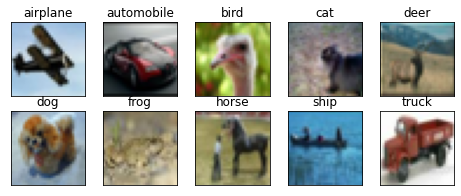

In [6]:
# Here are the classes in the CIFAR-10 dataset.
class_names = ["airplane", "automobile", "bird", "cat", "deer", 
              "dog", "frog", "horse", "ship", "truck"]

# number of cifar-10 data set classes
num_classes = 10

def visualize_classes():
    """This function visualizes the classes in an image classification
       dataset. It depends on the libraries Matplotlib and Numpy.

       Parameters:
       class_names(list): a list of strings for the different class names

       Returns: None

       Credit Tasfia Addrita, for letting me know to comment the transpose()
       invocation.
    
    """
    fig = plt.figure(figsize=(8,3))
    for i in range(num_classes):
        ax = fig.add_subplot(2, 5, 1+i, xticks=[], yticks=[])
        # get all indexes that match the current class 
        idx = np.where(y_train[:]==i)[0] 
        # get all images that match the class as well
        features_idx = x_train[idx,::]
        # get random image from this clasS
        img_num = np.random.randint(features_idx.shape[0])
        # im = np.transpose(features_idx[img_num, ::], (1, 2, 0))
        ax.set_title(class_names[i])
        plt.imshow(features_idx[img_num,::])
    plt.show()

visualize_classes()

## Image Data Preprocessing

In [ ]:
# Image Data Normalization
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255

In [ ]:
# Did it work? 
x_train[0]

### One-Hot Encoding the Output Label

In [ ]:
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

## Implementing a Sequential CNN in Keras

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32,kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation(tf.nn.softmax))

## Model Summary

In [ ]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()

## Training the Model

In [ ]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=100)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

## Running Predictions

In [ ]:
y_predicts = model.predict_classes(x_test)
y_predicts

## Check for Accuracy

In [ ]:
# Converting the Encoded Labels BACK to Base 10 values
y_test_argmax = np.argmax(y_test, axis=1)

In [ ]:
# Computing the Accuracy
total_count = len(y_test_argmax)
correct_count = 0
incorrect_count = 0
for num in range(len(y_test_argmax) -1):
    if y_test_argmax[num] == y_predicts[num]:
        correct_count += 1
    else:
        incorrect_count += 1

percentage_correct = correct_count/total_count
percentage_incorrect = incorrect_count/total_count
print(f'The percentage of correctly classified pictures is {percentage_correct*100}. ' +
      f'The percentage of correctly classified pictures is {percentage_incorrect*100}.')